#**Importing Libraries and Reading the Dataset**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [5]:
hd = pd.read_csv('/content/loan_approval_dataset.csv')

#**Dataset Inception**

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
hd.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(hd)
# profile.to_file("LoanApproval.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 52.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#**Data Handling**

In [8]:
#check missing value & duplicated
print(f'\nMissing value = \n{hd.isnull().sum()}')
print(f' \nDuplicated = {hd.duplicated().sum()}')


Missing value = 
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
 
Duplicated = 0


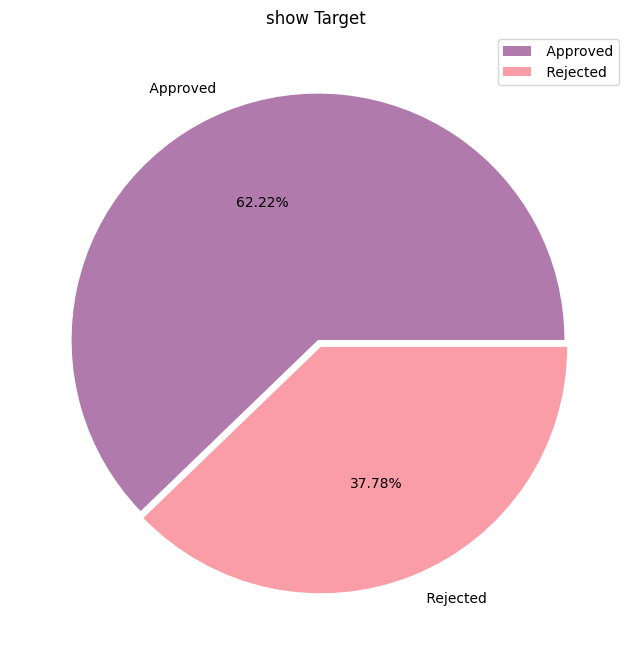

In [15]:
#show Target columns Analysis
consistent_colors = [  '#B07BAC', '#FB9DA7']
plt.figure(figsize=(10,8))
explode = (0,0.03)
plt.pie(hd[' loan_status'].value_counts().values,
        labels=hd[' loan_status'].value_counts().index,
        colors=consistent_colors[:len(hd[' loan_status'].value_counts())],
        explode=explode,
        autopct="%1.2f%%",
        )
plt.title('show Target ')
plt.legend()
plt.show()


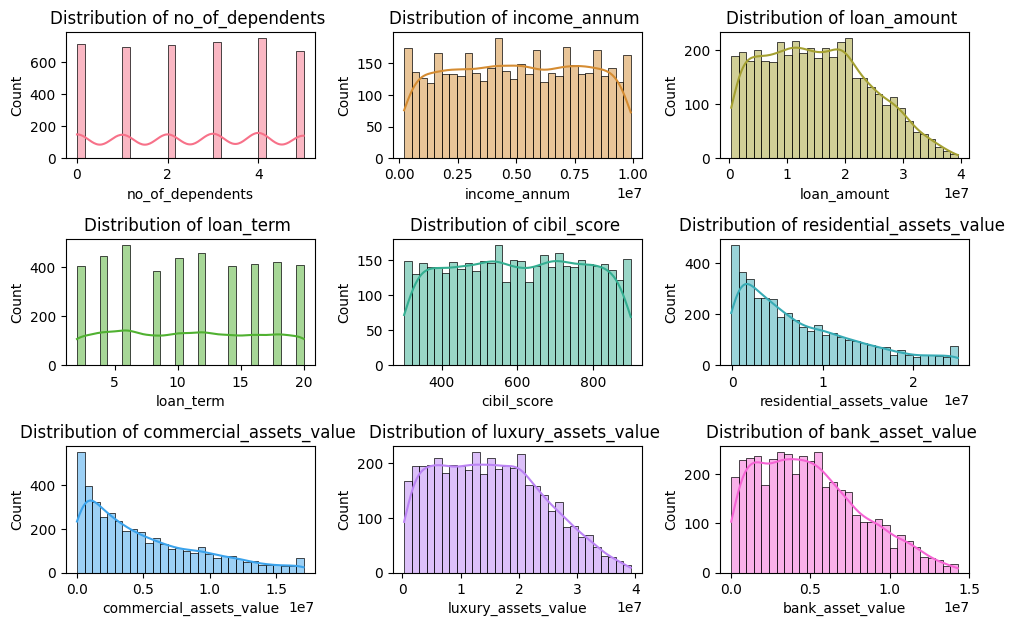

In [27]:
#show Distribution for all numerical columns
numerical = hd.select_dtypes(include=np.number).columns.tolist()
arr =sns.color_palette("husl",len(numerical))

plt.figure(figsize=(10,8))

#for loop
for i,col in enumerate(numerical,1):
    plt.subplot(4,3,i)
    sns.histplot(hd[col],kde=True ,color=arr[i-1], bins=30)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()

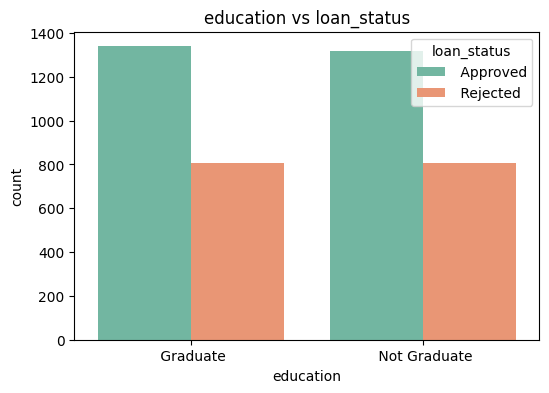

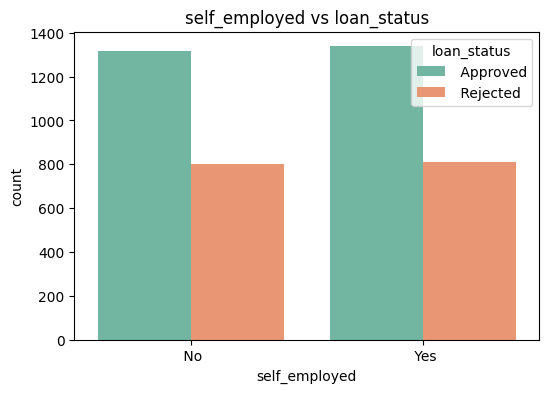

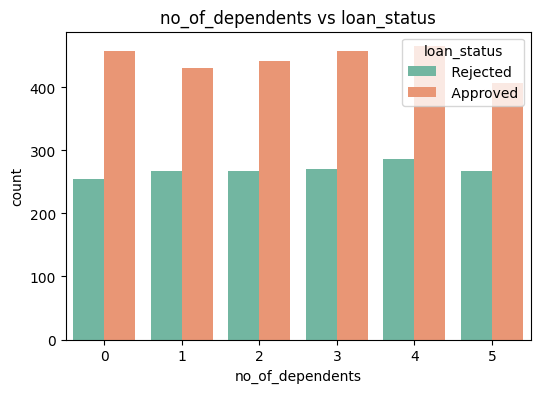

In [20]:
#Target with categorical Features
hd.columns = hd.columns.str.strip()
target = "loan_status"
categorical = ["education", "self_employed", "no_of_dependents"]
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=hd, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()

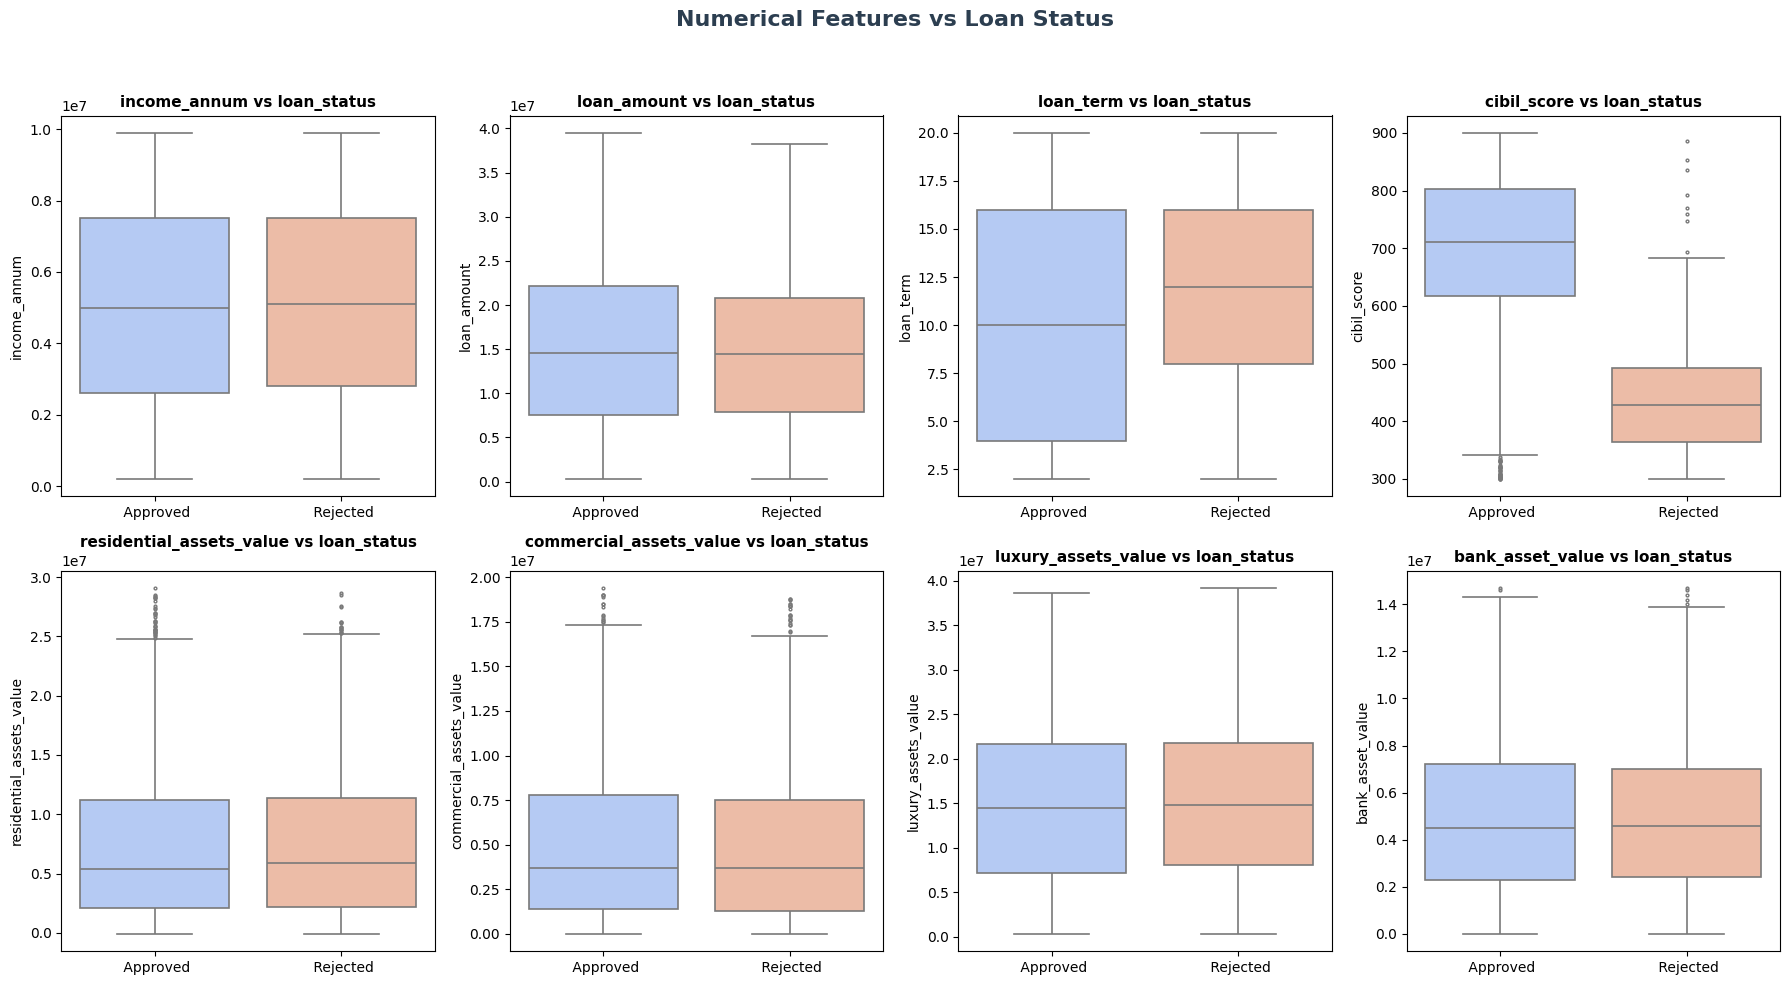

In [23]:
#Target with Numerical Features
numerical = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical):
    sns.boxplot(data=hd, x=target,y=col, ax=axes[i], palette="coolwarm",fliersize=2,linewidth=1.2)
    axes[i].set_title(f"{col} vs {target}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col, fontsize=10)
plt.suptitle("Numerical Features vs Loan Status", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#**Removing Outliers**

In [26]:
def remove_outliers_iqr(hd, column):
    Q1 = hd[column].quantile(0.25)
    Q3 = hd[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    hd[column] = hd[column].clip(lower, upper)
    return hd
num_cols = ['no_of_dependents','income_annum','loan_amount','loan_term',
            'cibil_score','residential_assets_value',
            'commercial_assets_value','luxury_assets_value','bank_asset_value']
for col in num_cols:
    hd = remove_outliers_iqr(hd,col)
hd=hd.drop(columns=['loan_id'])

#**Encoding**

In [29]:
enc = LabelEncoder()
hd['education'] = enc.fit_transform(hd['education'])
hd['self_employed'] = enc.fit_transform(hd['self_employed'])
hd['loan_status'] = enc.fit_transform(hd['loan_status'])

#**Data Splitting to train and test**

In [31]:
X = hd.drop(columns=['loan_status'])
y = hd['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 11)
Test shape: (854, 11)


#**Random Forest Model**

In [48]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


print("=== Random Forest Results === \n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




=== Random Forest Results === 

Accuracy: 0.9824355971896955

Confusion Matrix:
 [[528   3]
 [ 12 311]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



#**Address Class Imbalance (Bonus)**

In [37]:
from imblearn.over_sampling import SMOTE

SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())

Before SMOTE: {0: 2125, 1: 1290}
After SMOTE: {1: 2125, 0: 2125}


#**Decision Tree Model VS. Logistic Regression (Bonus)**

In [49]:
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train, y_train)
y_pred_tree = dct.predict(X_test)

print("=== Decision Tree Results === \n")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

=== Decision Tree Results === 

Accuracy: 0.9718969555035128
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.95      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [50]:
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("=== Logistic Regression Results ===\n")
print("Accuracy:", accuracy_score(y_test,y_pred_logreg))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Train):\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression Results ===

Accuracy: 0.7704918032786885

Confusion Matrix (Train):
 [[507  24]
 [172 151]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       531
           1       0.86      0.47      0.61       323

    accuracy                           0.77       854
   macro avg       0.80      0.71      0.72       854
weighted avg       0.79      0.77      0.75       854

